In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected
from tensorflow.examples.tutorials.mnist import input_data

from sklearn.preprocessing import MinMaxScaler

from keras import backend as K

#Clear TF memory
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

C:\Users\StrikeWade\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
mnist = input_data.read_data_sets('../mnist', one_hot=True)

Extracting ../mnist\train-images-idx3-ubyte.gz
Extracting ../mnist\train-labels-idx1-ubyte.gz
Extracting ../mnist\t10k-images-idx3-ubyte.gz
Extracting ../mnist\t10k-labels-idx1-ubyte.gz


In [3]:
tf.reset_default_graph()

In [4]:
num_inputs = 784                  #784
neurons_hidden1 = 392             #392
neurons_hidden2 = 196             #196
neurons_hidden3 = neurons_hidden1 #392
num_outputs = num_inputs          #784


learning_rate = 0.01
epochs = 5
batch_size = 150

#Placeholder
x = tf.placeholder(dtype=tf.float32, shape=[None, num_inputs])

In [5]:
activation = tf.nn.relu

In [6]:
#Init adapting its scale to the shape of the tensors
init = tf.variance_scaling_initializer()

In [7]:
#Weights
w1 = tf.Variable(init([num_inputs, neurons_hidden1]), dtype=tf.float32)
w2 = tf.Variable(init([neurons_hidden1, neurons_hidden2]), dtype=tf.float32)
w3 = tf.Variable(init([neurons_hidden2, neurons_hidden3]), dtype=tf.float32)
w4 = tf.Variable(init([neurons_hidden3, num_outputs]), dtype=tf.float32)

#Biases
b1 = tf.Variable(tf.zeros(neurons_hidden1))
b2 = tf.Variable(tf.zeros(neurons_hidden2))
b3 = tf.Variable(tf.zeros(neurons_hidden3))
b4 = tf.Variable(tf.zeros(num_outputs))

In [8]:
hidden_layer1 = activation(tf.matmul(x, w1)+b1)
hidden_layer2 = activation(tf.matmul(hidden_layer1, w2)+b2)
hidden_layer3 = activation(tf.matmul(hidden_layer2, w3)+b3)
outputs = activation(tf.matmul(hidden_layer3, w4)+b4)

In [9]:
#Loss function
loss = tf.reduce_mean(tf.square(outputs - x))

#Optimizer function
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

#Init
init = tf.global_variables_initializer()

#Saver
saver = tf.train.Saver()

In [10]:
with tf.Session() as sess:
    
    sess.run(init)
    
    for epoch in range(epochs):
        
        num_batches = mnist.train.num_examples // batch_size
        
        for i in range(num_batches):
            
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            
            sess.run(optimizer, feed_dict={x: batch_x})
            
        train_loss = loss.eval(feed_dict={x: batch_x})
        
        print('[%d/%d],    Loss: %f' % (epoch, epochs, train_loss))
    
    saver.save(sess, 'stacked_autoencoder/stacked_autoencoder.ckpt')

[0/5],    Loss: 0.031681
[1/5],    Loss: 0.029191
[2/5],    Loss: 0.028144
[3/5],    Loss: 0.027801
[4/5],    Loss: 0.027208


In [19]:
num_test_images = 10

with tf.Session() as sess:
    
    saver.restore(sess, 'stacked_autoencoder/stacked_autoencoder.ckpt')
    
    output_results = outputs.eval(feed_dict={x: mnist.test.images[:num_test_images]})
    hidden1_results = hidden_layer1.eval(feed_dict={x: mnist.test.images[:num_test_images]})
    hidden2_results = hidden_layer2.eval(feed_dict={x: mnist.test.images[:num_test_images]})
    hidden3_results = hidden_layer3.eval(feed_dict={x: mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from stacked_autoencoder/stacked_autoencoder.ckpt


In [20]:
print(output_results.shape)
print(hidden1_results.shape)
print(hidden2_results.shape)
print(hidden3_results.shape)

(10, 784)
(10, 392)
(10, 196)
(10, 392)


# Plot the test results

## Outputs layer

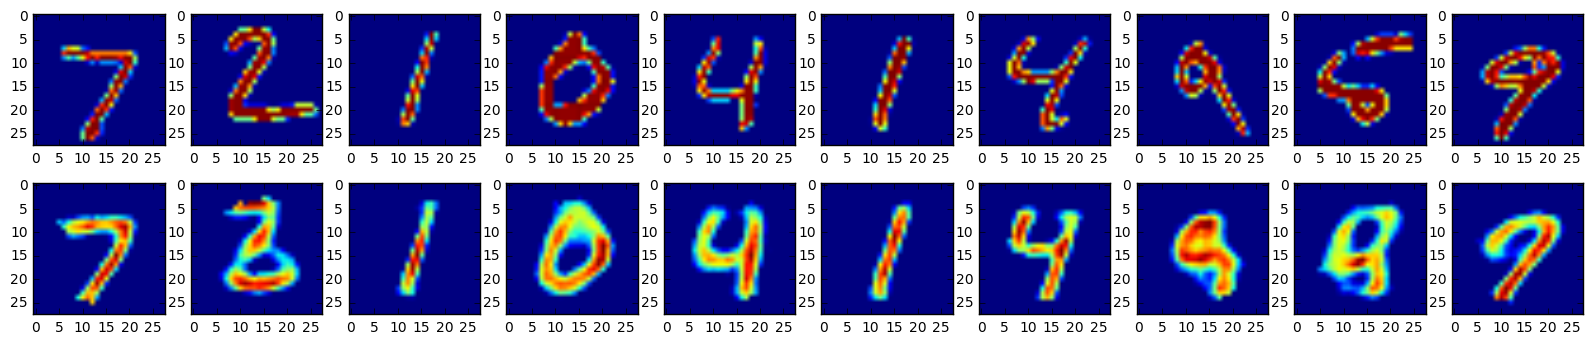

In [21]:
f, ax = plt.subplots(nrows=2, ncols=10, figsize=[20,4])
for i in range(num_test_images):
    ax[0][i].imshow(np.reshape(mnist.test.images[i], newshape=[28,28]))
    ax[1][i].imshow(np.reshape(output_results[i], newshape=[28,28]))

## hidden1 layer

ValueError: cannot reshape array of size 392 into shape (20,20)

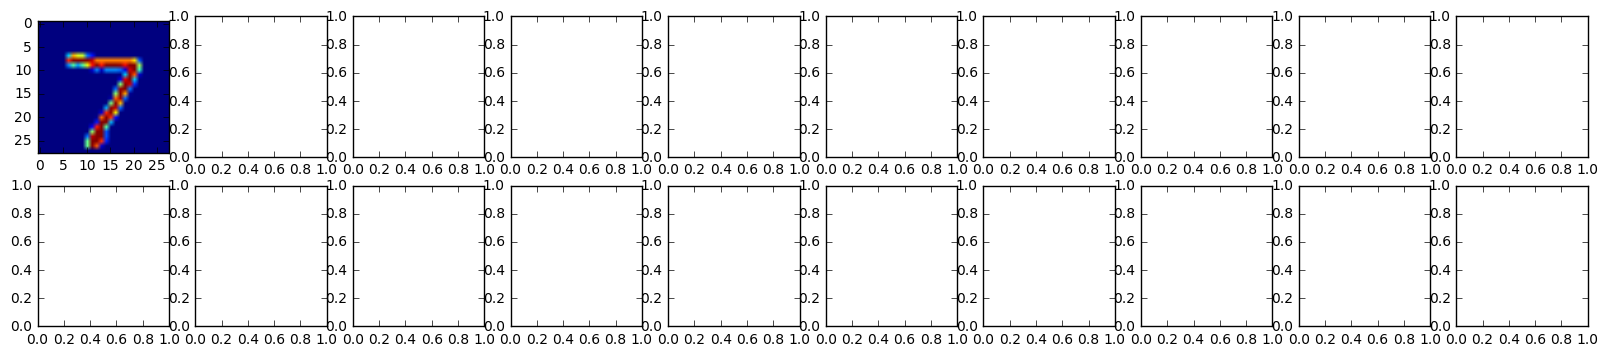

In [22]:
f, ax = plt.subplots(nrows=2, ncols=10, figsize=[20,4])
for i in range(num_test_images):
    ax[0][i].imshow(np.reshape(mnist.test.images[i], newshape=[28,28]))
    ax[1][i].imshow(np.reshape(hidden1_results[i], newshape=[20,20]))

## hidden2 layer

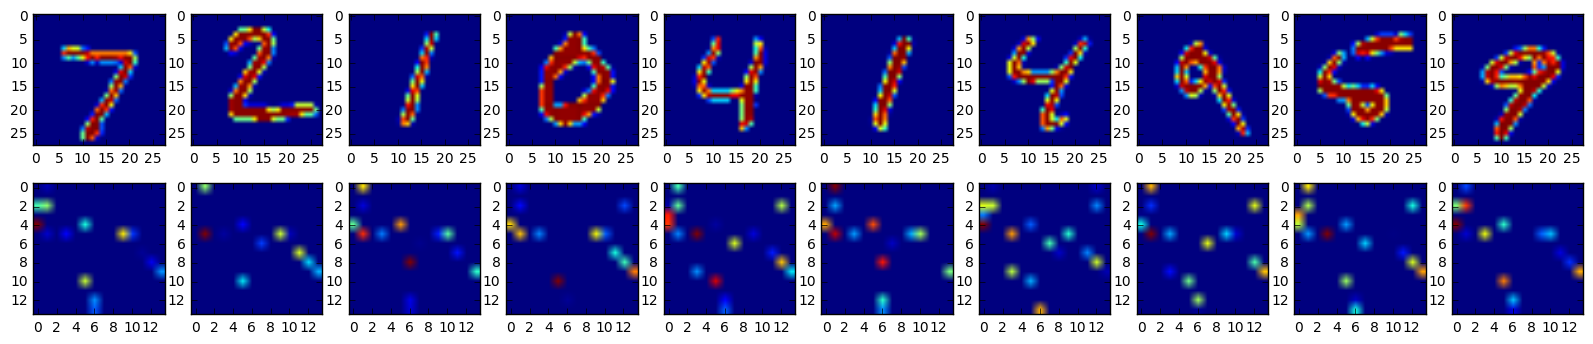

In [23]:
f, ax = plt.subplots(nrows=2, ncols=10, figsize=[20,4])
for i in range(num_test_images):
    ax[0][i].imshow(np.reshape(mnist.test.images[i], newshape=[28,28]))
    ax[1][i].imshow(np.reshape(hidden2_results[i], newshape=[14,14]))

## hidden3 layer